In [134]:
import matplotlib
import lmfit
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [135]:
last_k = 10
df_india = pd.read_csv("data/time_series_covid19_confirmed_India_20200410.csv")

In [136]:
df_india

,Province/State,Country/Region,Lat,Long,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,...,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10
0,Andaman and Nicobar Islands,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,11.0
1,Andhra Pradesh,India,20,70,0.0,0.0,0.0,1.0,1.0,1.0,...,83.0,86.0,132.0,161.0,190.0,226.0,266.0,305.0,348.0,348.0
2,Arunachal Pradesh,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Assam,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,16.0,24.0,26.0,26.0,26.0,27.0,28.0,29.0
4,Bihar,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,24.0,29.0,30.0,30.0,32.0,32.0,38.0,39.0,39.0
5,Chandigarh,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
6,Chhattisgarh,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0
7,Delhi,India,20,70,4.0,5.0,6.0,7.0,7.0,7.0,...,152.0,219.0,219.0,445.0,503.0,523.0,576.0,576.0,669.0,720.0
8,Goa,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
9,Gujarat,India,20,70,0.0,0.0,0.0,0.0,0.0,0.0,...,82.0,87.0,95.0,105.0,122.0,144.0,165.0,165.0,179.0,241.0


Transform India data : Since we iterate over dates, it is easier to have dates as rows instead of columns 


In [137]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 10)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))

In [138]:
analysis_dates

['2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10']

In [139]:
# Transform India data
india_data = []

for index, row in df_india.iterrows():
    for d in analysis_dates:
        data_point = {
            'date' : d,
            'state' : row['Province/State'],
            'cases' : row[d]
        }
        india_data.append(data_point)

df_india_transform = pd.DataFrame(india_data)

In [140]:
df_india_transform_e = df_india_transform[df_india_transform.state == "Kerala"]
ind_state = df_india_transform_e.reset_index()
ind_state

,index,date,state,cases
0,480,2020-03-10,Kerala,9.0
1,481,2020-03-11,Kerala,17.0
2,482,2020-03-12,Kerala,17.0
3,483,2020-03-13,Kerala,19.0
4,484,2020-03-14,Kerala,19.0
5,485,2020-03-15,Kerala,22.0
6,486,2020-03-16,Kerala,23.0
7,487,2020-03-17,Kerala,26.0
8,488,2020-03-18,Kerala,27.0
9,489,2020-03-19,Kerala,27.0


In [141]:
daily_count=[]
daily_difference=[]

for index, row in ind_state.iterrows():
    count = row.loc['cases']
    daily_count.append(count)

length = len(daily_count) 
i = 0
j = 0
delta = 0
# Iterating using while loop 
while i < length-1: 
    j = i+1
    delta = daily_count[j] - daily_count[i]
    daily_difference.append(delta)
    i = i+1 
print (daily_difference)

[8.0, 0.0, 2.0, 0.0, 3.0, 1.0, 3.0, 1.0, 0.0, 1.0, 12.0, 12.0, 15.0, 28.0, 14.0, 9.0, 19.0, 39.0, 6.0, 20.0, 32.0, 7.0, 24.0, 21.0, 9.0, 11.0, 8.0, 13.0, 9.0, 9.0, 12.0]


    Daily difference  Rolling Average
0                8.0              NaN
1                0.0              NaN
2                2.0              NaN
3                0.0              NaN
4                3.0              2.6
5                1.0              1.2
6                3.0              1.8
7                1.0              1.6
8                0.0              1.6
9                1.0              1.2
10              12.0              3.4
11              12.0              5.2
12              15.0              8.0
13              28.0             13.6
14              14.0             16.2
15               9.0             15.6
16              19.0             17.0
17              39.0             21.8
18               6.0             17.4
19              20.0             18.6
20              32.0             23.2
21               7.0             20.8
22              24.0             17.8
23              21.0             20.8
24               9.0             18.6
25          

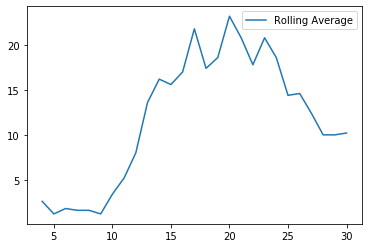

In [142]:
df = pd.DataFrame()
df['Daily difference']=daily_difference
df['Rolling Average']=df.rolling(5).mean()
print (df)
df.plot(y='Rolling Average', kind = 'line')
plt.show()

In [143]:
model = PowerLawModel()
params = model.guess(ind_state.cases, x=ind_state.cases.index)

In [144]:
def label(l):
    return 'Predictions as of ' + str(ind_state.date[l-1])

In [145]:
model = PowerLawModel()
last = len(ind_state)
params = model.guess(ind_state.cases, x=ind_state.cases.index)
answers = {}
for i in range(last_k):
    ind = last-i
    answers[i]= {'label': label(ind), 'model': model.fit(ind_state.cases[:ind], params, x=ind_state.cases.index[:ind])}
    ind_state[label(ind)] = list(map(lambda x: int(x), answers[i]['model'].eval(x=ind_state.cases.index)))


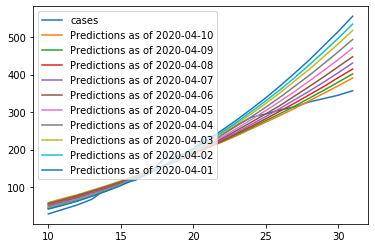

In [146]:
ind_state[['cases'] + [label(last-i) for i in range(last_k)]][10:].plot()